In [4]:
# Essentials:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering algorithm
from sklearn.cluster import AgglomerativeClustering

# Rand Index
from sklearn.metrics.cluster import rand_score

# Encode labels
from sklearn import preprocessing

# Confusion Matrix
from sklearn.metrics import confusion_matrix

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


https://www.kaggle.com/code/halflingwizard/clustering-categorical-data-using-gower-distance/notebook

In [7]:
data_full = pd.read_csv('data/mushrooms.csv')
data_full.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [27]:
data_full.shape

(8124, 23)

In [8]:
# To make the code reproducable
np.random.seed(42)

# Preprocessing

In [10]:
target = data_full[['class']]
data_no_target = data_full.drop(['class'],axis=1)
data_no_target.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


# Examine Data type

In [11]:
data_no_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

# Investigate categories

In [12]:
data_no_target.nunique()

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [15]:
data_categorical = data_no_target.drop(['veil-type'], axis=1)

# Gower Distance

In [20]:
# !pip install gower

In [18]:
import gower

In [19]:
distance_matrix = gower.gower_matrix(data_categorical)
distance_matrix

array([[0.        , 0.33333334, 0.42857143, ..., 0.61904764, 0.5714286 ,
        0.5714286 ],
       [0.33333334, 0.        , 0.23809524, ..., 0.61904764, 0.6666667 ,
        0.5714286 ],
       [0.42857143, 0.23809524, 0.        , ..., 0.5714286 , 0.6666667 ,
        0.61904764],
       ...,
       [0.61904764, 0.61904764, 0.5714286 , ..., 0.        , 0.6666667 ,
        0.14285715],
       [0.5714286 , 0.6666667 , 0.6666667 , ..., 0.6666667 , 0.        ,
        0.6666667 ],
       [0.5714286 , 0.5714286 , 0.61904764, ..., 0.14285715, 0.6666667 ,
        0.        ]], dtype=float32)

## Using Gower Distance for Agglomerative Clustering

In [23]:
encoder = preprocessing.LabelEncoder()

encoded_target = target.apply(encoder.fit_transform)
print(f'in this encoding, {encoded_target.iloc[0].values} represents {target.iloc[0].values}')

in this encoding, [1] represents ['p']


In [24]:
labels = pd.DataFrame()
labels['target'] = encoded_target.values.reshape(1, -1).tolist()[0]

## Agglomerative Clustering with Single Linkage

In [26]:
model_single = AgglomerativeClustering(n_clusters=2, linkage='single', affinity='precomputed')
clusters_single = model_single.fit_predict(distance_matrix)

In [28]:
labels['single-predictions'] = clusters_single

In [30]:
sri = rand_score(encoded_target.values.reshape(1, -1)[0], clusters_single)
print(f'Rand Index: {sri}')

Rand Index: 0.500002576099026


<AxesSubplot:ylabel='None'>

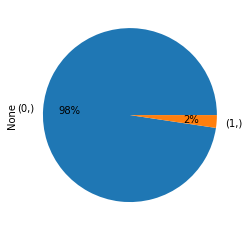

In [31]:
labels[['single-predictions']].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

## Agglomerative Clustering with Average Linkage

In [32]:
model_average = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='precomputed')
clusters_average = model_average.fit_predict(distance_matrix)

In [33]:
labels['average-predictions'] = clusters_average

In [34]:
ari = rand_score(encoded_target.values.reshape(1, -1)[0], clusters_average)
print(f'Rand Index: {ari}')

Rand Index: 0.5010325307966577


<AxesSubplot:ylabel='None'>

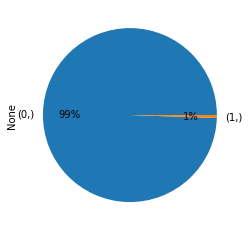

In [35]:
labels[['average-predictions']].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

## Agglomerative Clustering with Complete Linkage

In [36]:
model_complete = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity='precomputed')
clusters_complete = model_complete.fit_predict(distance_matrix)

In [37]:
labels['complete-predictions'] = clusters_complete

In [38]:
cri = rand_score(encoded_target.values.reshape(1, -1)[0], clusters_complete)
print(f'Rand Index: {cri}')

Rand Index: 0.638992150050434


<AxesSubplot:ylabel='None'>

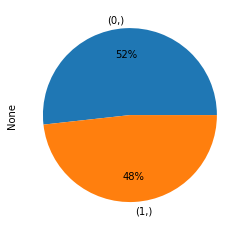

In [39]:
labels[['complete-predictions']].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

In [40]:
labels.value_counts(["target", "complete-predictions"])

target  complete-predictions
0       1                       3104
1       0                       3100
0       0                       1104
1       1                        816
dtype: int64

In [41]:
labels['aligned-clusters'] = labels['complete-predictions'].apply(lambda x: int(not x))

In [42]:
labels.value_counts(["target", "aligned-clusters"])

target  aligned-clusters
0       0                   3104
1       1                   3100
0       1                   1104
1       0                    816
dtype: int64

## Confusion Matrix

Text(0.5, 15.0, 'Predicted Labels')

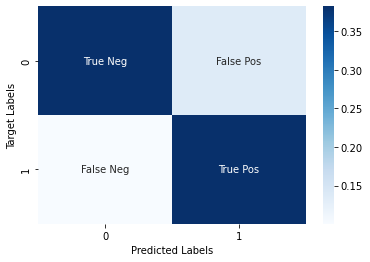

In [44]:
cf_matrix = confusion_matrix(encoded_target.values.reshape(1, -1)[0], labels[["aligned-clusters"]].values.reshape(1, -1)[0])
cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_labels = np.asarray(cf_labels).reshape(2,2)
fig, ax = plt.subplots(1, 1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=cf_labels, fmt='', cmap='Blues')
ax.set_ylabel('Target Labels')    
ax.set_xlabel('Predicted Labels')

In [45]:
True_neg = cf_matrix[0,0]
False_pos = cf_matrix[0,1]
True_pos = cf_matrix[1,1]
False_neg = cf_matrix[1,0]

accuracy = (True_neg + True_pos)/(True_neg + False_neg + True_pos + False_pos)
recall = (True_pos)/(False_neg+True_pos)
precision = (True_pos)/(False_pos + True_pos)
F1_score = 2 * ((precision*recall)/(precision+recall))

In [46]:
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1_score: {F1_score}')

Accuracy: 0.7636632200886263
Recall: 0.7916241062308478
Precision: 0.7373929590865842
F1_score: 0.7635467980295566
